In [2]:
import requests
import pandas as pd
import time
from datetime import datetime
import json
import matplotlib.pyplot as plt
import os
import re
import numpy as np

In [3]:
market_dict = {
    'binance' :
        ['https://api.binance.com/api/v3/depth', {'symbol' : 'BTCUSDT', 'limit' : 5000}],
    'coinbase' :
        ['https://api.pro.coinbase.com/products/BTC-USD/book', {'level' : 3} ],
    'huobi' : 
        ['https://api.huobi.pro/market/depth', {'symbol' : 'btcusdt', 'type' : 'step1', 'depth': 20}],
    'kraken' : 
        ['https://api.kraken.com/0/public/Depth', {'pair' : 'BTCUSD', 'count' : 50}],
    'bitfinex' : 
        ['https://api-pub.bitfinex.com/v2/book/tBTCUSD/R0/', {'len' : 100}]
    }


In [4]:
while True:
    tic = time.time()
    for name, (url, params) in market_dict.items():
        r = requests.get(url=url, params=params)
        current_time = datetime.now()
        filename = './' + name + '/' + current_time.strftime('%Y-%m-%d_%H:%M:%S')+'.json'
        with open(filename, 'w+') as f:
            f.write(r.text)
    toc = time.time()
    time.sleep(60*5 - (toc - tic))
    break

KeyboardInterrupt: 

I checked

1. HUOBI
2. Coinbase
3. Binance
4. Kraken
5. Bitfinex


In [5]:
 df[ df['amount'] <= 0].abs()

NameError: name 'df' is not defined

In [20]:
# Bitfinex
df_bitfinex_timeline = pd.DataFrame(columns=['time', 'ask_volume', 'bid_volume'])

# this is for
temporary_list = []

# this is for opening json files
for filename in os.listdir('./bitfinex/'):
    with open('./bitfinex/' + filename, 'r') as f:
        my_json = json.load(f)
    
        # Creating two tables (ask_df and bids_df)
        df = pd.DataFrame(my_json, columns = ['scrap', 'price', 'amount'])

        bids_df = df[ df['amount'] > 0]
        asks_df = df[ df['amount'] <= 0].abs()

        del asks_df['scrap']
        del bids_df['scrap']

        # Changing string type data into float
        asks_df = asks_df.astype('float64')
        # Create a new column 'total_amount'
        asks_df['total_amount'] = asks_df['price'] * asks_df['amount']

        bids_df = bids_df.astype('float64')
        bids_df['total_amount'] = bids_df['price'] * bids_df['amount']

        # Separates file name from its file extension
        timepoint = os.path.splitext(filename)[0]
        timepoint_datetime = datetime.strptime(timepoint, '%Y-%m-%d_%H_%M_%S')
        asks_total_two_percent = asks_df [asks_df['price'] <= asks_df['price'].min() * 1.02]['total_amount'].sum()
        bids_total_two_percent = bids_df [ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum()
        
        asks_average_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum() / asks_df['amount'].sum()
        bids_average_two_percent = bids_df[ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum() / bids_df['amount'].sum()
            
        temporary_list.append(
            pd.DataFrame.from_dict({'time' : [timepoint_datetime],
                                    'ask_volume' : [asks_total_two_percent],
                                    'bid_volume' : [bids_total_two_percent],
                                    'ask_avg_price': [asks_average_two_percent],
                                    'bid_avg_price': [bids_average_two_percent]}))
    


In [21]:
df_bitfinex_timeline = pd.concat(temporary_list)
df_bitfinex_timeline = df_bitfinex_timeline.sort_values(by='time')
df_bitfinex_timeline.to_csv('./data_csvs/bitfinex.csv')

In [22]:
# sum of orders
asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum()

985357.9488382186

In [23]:
# avg bitcoin price
asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum() / asks_df['amount'].sum()

11738.074666219427

In [24]:
#huobi
df_huobi_timeline = pd.DataFrame(columns=['time', 'ask_volume', 'bid_volume'])

temporary_list = []

for filename in os.listdir('./huobi/'):
    with open('./huobi/2020-08-28_17:01:46.json', 'r') as f:
        my_json = json.load(f)
        #df = pd.DataFrame(my_json, columns = ['price', 'amount'])
        asks_df = pd.DataFrame(my_json['ticks']['asks'], columns=['price', 'amount'])
        bids_df = pd.DataFrame(my_json['ticks']['bids'], columns=['price', 'amount'])
        
        

FileNotFoundError: [Errno 2] No such file or directory: './huobi/2020-08-28_17:01:46.json'

In [31]:
#Coinbase
df_coinbase_timeline = pd.DataFrame(columns=['time', 'ask_volume', 'bid_volume', 'ask_avg_price', 'bid_avg_price'])

temporary_list = []

for filename in os.listdir('./coinbase/'):
    with open('./coinbase/' + filename, 'r') as f:
        my_json = json.load(f)
        # df = pd.DataFrame(my_json, columns = ['order', 'price', 'amount'])
        asks_df = pd.DataFrame(my_json['asks'], columns=['price', 'amount', 'scrap'])
        bids_df = pd.DataFrame(my_json['bids'], columns=['price', 'amount', 'scrap'])
        
        del asks_df['scrap']
        del bids_df['scrap']
        
        asks_df = asks_df.astype('float64')
        bids_df = bids_df.astype('float64')
        asks_df['total_amount'] = asks_df['price'] * asks_df['amount']        
        bids_df['total_amount'] = bids_df['price'] * bids_df['amount']
        
        timepoint = os.path.splitext(filename)[0]
        timepoint_datetime = datetime.strptime(timepoint, '%Y-%m-%d_%H_%M_%S')
        
        asks_total_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum()
        bids_total_two_percent = bids_df [ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum()
        
        asks_average_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum() / asks_df['amount'].sum()
        bids_average_two_percent = bids_df[ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum() / bids_df['amount'].sum()
            
        temporary_list.append(
            pd.DataFrame.from_dict({'time' : [timepoint_datetime],
                                    'ask_volume' : [asks_total_two_percent],
                                    'bid_volume' : [bids_total_two_percent],
                                    'ask_avg_price': [asks_average_two_percent],
                                    'bid_avg_price': [bids_average_two_percent]}))

In [32]:
df_coinbase_timeline = pd.concat(temporary_list)
df_coinbase_timeline = df_coinbase_timeline.sort_values(by='time')
df_coinbase_timeline.to_csv('./data_csvs/coinbase.csv')

In [37]:
#Kraken
df_kraken_timeline = pd.DataFrame(columns=['time', 'ask_volume', 'bid_volume', 'ask_avg_price', 'bid_avg_price'])

temporary_list = []

for filename in os.listdir('./kraken/'):
    with open('./kraken/' + filename, 'r') as f:
        my_json = json.load(f)
        # df = pd.DataFrame(my_json, columns = ['order', 'price', 'amount'])
        asks_df = pd.DataFrame(my_json['result']['XXBTZUSD']['asks'], columns=['price', 'amount', 'scrap'])
        bids_df = pd.DataFrame(my_json['result']['XXBTZUSD']['bids'], columns=['price', 'amount', 'scrap'])
        
        del asks_df['scrap']
        del bids_df['scrap']
        
        asks_df = asks_df.astype('float64')
        bids_df = bids_df.astype('float64')
        asks_df['total_amount'] = asks_df['price'] * asks_df['amount']        
        bids_df['total_amount'] = bids_df['price'] * bids_df['amount']
        
        timepoint = os.path.splitext(filename)[0]
        timepoint_datetime = datetime.strptime(timepoint, '%Y-%m-%d_%H_%M_%S')
        
        asks_total_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum()
        bids_total_two_percent = bids_df [ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum()
        
        asks_average_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum() / asks_df['amount'].sum()
        bids_average_two_percent = bids_df[ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum() / bids_df['amount'].sum()
            
        temporary_list.append(
            pd.DataFrame.from_dict({'time' : [timepoint_datetime],
                                    'ask_volume' : [asks_total_two_percent],
                                    'bid_volume' : [bids_total_two_percent],
                                    'ask_avg_price': [asks_average_two_percent],
                                    'bid_avg_price': [bids_average_two_percent]}))

In [38]:
df_kraken_timeline = pd.concat(temporary_list)
df_kraken_timeline = df_kraken_timeline.sort_values(by='time')
df_kraken_timeline.to_csv('./data_csvs/kraken.csv')

In [40]:
#Binance
df_binance_timeline = pd.DataFrame(columns=['time', 'ask_volume', 'bid_volume', 'ask_avg_price', 'bid_avg_price'])

temporary_list = []

for filename in os.listdir('./binance/'):
    with open('./binance/' + filename, 'r') as f:
        my_json = json.load(f)
        # df = pd.DataFrame(my_json, columns = ['order', 'price', 'amount'])
        asks_df = pd.DataFrame(my_json['asks'], columns=['price', 'amount'])
        bids_df = pd.DataFrame(my_json['bids'], columns=['price', 'amount'])
        
        # asks_df = df[ df['amount'] > 0]
        # bids_df = df[ df['amount'] <= 0]
        
        # del asks_df['order']
        # del bids_df['order']
        
        asks_df = asks_df.astype('float64')
        bids_df = bids_df.astype('float64')
        asks_df['total_amount'] = asks_df['price'] * asks_df['amount']        
        bids_df['total_amount'] = bids_df['price'] * bids_df['amount']
        
        timepoint = os.path.splitext(filename)[0]
        timepoint_datetime = datetime.strptime(timepoint, '%Y-%m-%d_%H_%M_%S')
        
        asks_total_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum()
        bids_total_two_percent = bids_df [ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum()
        
        asks_average_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum() / asks_df['amount'].sum()
        bids_average_two_percent = bids_df[ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum() / bids_df['amount'].sum()
            
        temporary_list.append(
            pd.DataFrame.from_dict({'time' : [timepoint_datetime],
                                    'ask_volume' : [asks_total_two_percent],
                                    'bid_volume' : [bids_total_two_percent],
                                    'ask_avg_price': [asks_average_two_percent],
                                    'bid_avg_price': [bids_average_two_percent]}))

In [41]:
df_binance_timeline = pd.concat(temporary_list)
df_binance_timeline = df_binance_timeline.sort_values(by='time')
df_binance_timeline.to_csv('./data_csvs/binance.csv')

In [25]:
#HUOBIIII
df_huobi_timeline = pd.DataFrame(columns=['time', 'ask_volume', 'bid_volume', 'ask_avg_price', 'bid_avg_price'])

temporary_list = []

for filename in os.listdir('./huobi/'):
    with open('./huobi/' + filename, 'r') as f:
        my_json = json.load(f)
        # df = pd.DataFrame(my_json, columns = ['order', 'price', 'amount'])
        asks_df = pd.DataFrame(my_json['tick']['asks'], columns=['price', 'amount'])
        bids_df = pd.DataFrame(my_json['tick']['bids'], columns=['price', 'amount'])
        
        # asks_df = df[ df['amount'] > 0]
        # bids_df = df[ df['amount'] <= 0]
        
        # del asks_df['order']
        # del bids_df['order']
        
        asks_df = asks_df.astype('float64')
        bids_df = bids_df.astype('float64')
        asks_df['total_amount'] = asks_df['price'] * asks_df['amount']        
        bids_df['total_amount'] = bids_df['price'] * bids_df['amount']
        
        timepoint = os.path.splitext(filename)[0]
        timepoint_datetime = datetime.strptime(timepoint, '%Y-%m-%d_%H_%M_%S')
        
        asks_total_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum()
        bids_total_two_percent = bids_df [ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum()
        
        asks_average_two_percent = asks_df[ asks_df['price'] <= asks_df['price'].min() * 1.02 ]['total_amount'].sum() / asks_df['amount'].sum()
        bids_average_two_percent = bids_df[ bids_df['price'] >= bids_df['price'].max() * 0.98 ]['total_amount'].sum() / bids_df['amount'].sum()
            
        temporary_list.append(
            pd.DataFrame.from_dict({'time' : [timepoint_datetime],
                                    'ask_volume' : [asks_total_two_percent],
                                    'bid_volume' : [bids_total_two_percent],
                                    'ask_avg_price': [asks_average_two_percent],
                                    'bid_avg_price': [bids_average_two_percent]}))

In [26]:
df_huobi_timeline = pd.concat(temporary_list)
df_huobi_timeline = df_huobi_timeline.sort_values(by='time')
df_huobi_timeline.to_csv('./data_csvs/huobi.csv')

# df_huobi_timeline

In [29]:
df_coinbase_timeline.iloc[-1]

NameError: name 'df_coinbase_timeline' is not defined

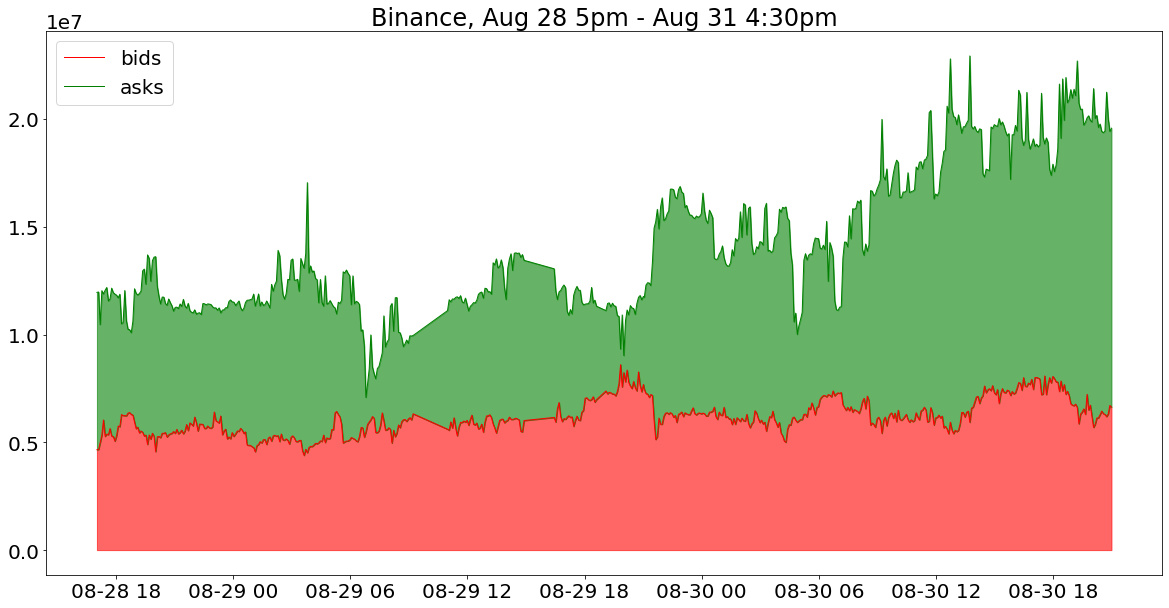

In [42]:
# def my_plot(df, marketname):
df = df_binance_timeline
marketname = 'Binance'
time = df['time']
bid = df['bid_volume']
ask = df['ask_volume']
#bid_avg = df['bid_avg_price']
#ask_avg = df['ask_avg_price']

fig= plt.gcf()
fig.set_size_inches(20,10)
plt.plot(time, bid, '-r', linewidth=1)
plt.plot(time, ask, '-g', linewidth=1)
plt.fill_between(time, bid, color='r', alpha=0.6)
plt.fill_between(time, bid, ask, color='g', alpha=0.6)
# plt.fill_between(time, ask, bid, color='b', alpha=0.6)
plt.legend(['bids', 'asks'])
plt.title(str(marketname) + ', Aug 28 5pm - Aug 31 4:30pm')
plt.rc('font', size=20)
# plt.yscale('log')

# plt.show()
plt.savefig('./figures/' + marketname + '_timeseries.png', dpi=300)

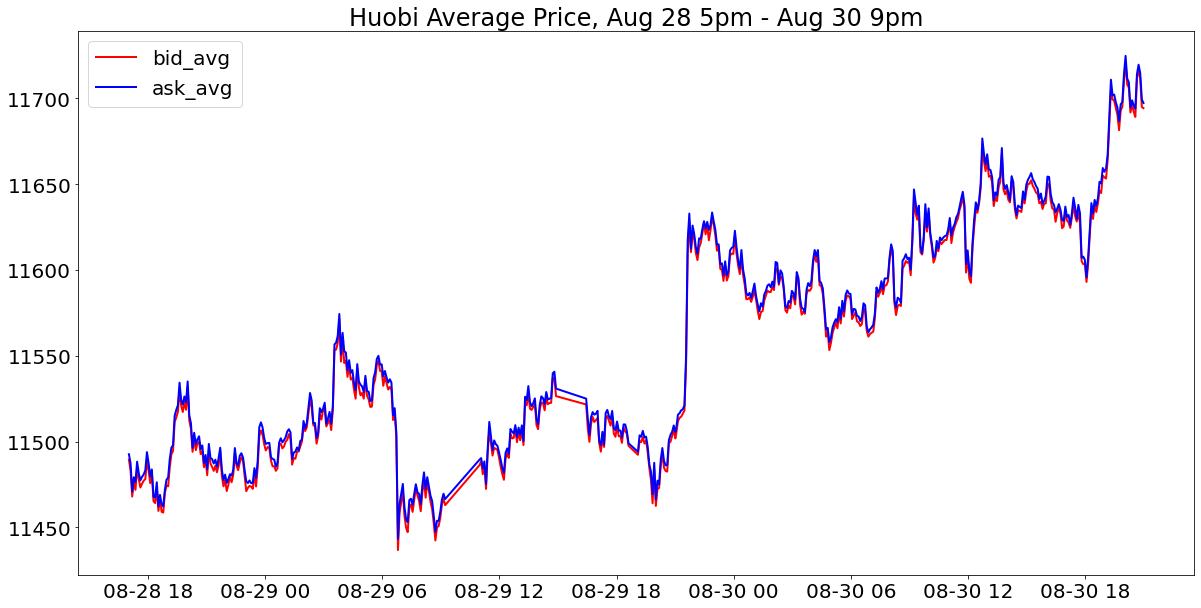

In [34]:
# #def my_plot(df, marketname):
# df = df_huobi_timeline
# marketname = 'Huobi Average Price'
# time = df['time']
# #bid = df['bid_volume']
# #ask = df['ask_volume']
# bid_avg = df['bid_avg_price']
# ask_avg = df['ask_avg_price']

# fig= plt.gcf()
# fig.set_size_inches(20,10)
# plt.plot(time, bid_avg, '-r', linewidth=2)
# plt.plot(time, ask_avg, '-b', linewidth=2)
# # plt.fill_between(time, bid_avg, color='r', alpha=0.6)
# # plt.fill_between(time, ask_avg, color='b', alpha=0.6)
# plt.legend(['bid_avg', 'ask_avg'])
# plt.title(str(marketname) + ', Aug 28 5pm - Aug 30 9pm')
# plt.rc('font', size=20)

# # plt.show()

# plt.savefig('./figures/' + marketname + '_timeseries.png', dpi=300)